In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv")
print('Dataframe shape:', df.shape)


Dataframe shape: (15547, 5)


In [72]:
print(df.columns.tolist())

['year', 'month', 'day', 'gender', 'births']


In [73]:
df.gender.value_counts()

F    7776
M    7771
Name: gender, dtype: int64

In [74]:
df.head() #first five observations

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [75]:
df.tail() #last 5 observations

,year,month,day,gender,births
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215
15546,2008,12,NaN,M,181235


We see that that the data is relatively simple–it contains the number of births grouped by date and gender. The tail values show some missing values. Let's investigate further.

In [76]:
df.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [77]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

There are 480 missing values for the day of birth. Also note an error in the max of day (currently 99) which should not be more than 31 depending on the month of the year. The std on day column is also relatively high due to anomalously high values.

In [78]:
months_with_errors = df[df["day"]>31] #months with more than 31 days. 

months_with_errors

,year,month,day,gender,births
62,1969,1,99.0,F,26
63,1969,1,99.0,M,38
126,1969,2,99.0,F,42
127,1969,2,99.0,M,48
190,1969,3,99.0,F,64
...,...,...,...,...,...
14572,1988,4,99.0,F,1
14635,1988,5,99.0,F,1
14696,1988,6,99.0,F,1
14697,1988,6,99.0,M,1


In [79]:
df.drop(months_with_errors.index, inplace = True) #Eliminate those 350 rows. The number of rows should be 15547 less 350
df

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [80]:
15547-15197 #Confirm if 350

350

In [81]:
list_of_day = df['day'].tolist() #prefer changing to list
day_np=np.array(list_of_day) #modify to np array
#day_np[day_np > 31] = np.nan #find months that indicate day above 31 and replace with nan
#check if months 1,2,3,5,7,8,10,12 have 31 days or less
#check if months 9,4,6 and 11 have days equal or less than 30
day_mean=np.nanmean(day_np)
day_mean
#df['day'].replace(df[df["day"]>31], np.NaN)

15.838078412719984

In [82]:
mean_day = df['day'].mean()
mean_day

15.838078412719984

In [83]:
df.isnull().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [84]:
df.describe()

,year,month,day,births
count,15197.000000,15197.000000,14717.000000,15197.000000
mean,1979.095940,6.516813,15.838078,9986.706258
std,6.749456,3.449624,8.859636,28840.649834
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4388.000000
50%,1979.000000,7.000000,16.000000,4837.000000
75%,1984.000000,10.000000,23.000000,5300.000000
max,2008.000000,12.000000,31.000000,199622.000000


In [85]:
#fill NaNs with column mean in 'day' column
df['day'] = df['day'].fillna(df['day'].mean())

#view updated summary of null values
df.isnull().sum()

year      0
month     0
day       0
gender    0
births    0
dtype: int64

In [86]:
#check if months 1,3,5,7,8,10,12 have 31 days or less
days_31 = [1,3,5,7,8,10,12]
#check if month 2 has 28 or 29 days
#check if months 9,4,6 and 11 have days equal or less than 30
days_30 = [9,4,6,11]
df.loc[(df['month'] == 1) & (df['day'] > 31),'Days_with_error'] = 'Yes'
df.loc[(df['month'] == 3) & (df['day'] > 31),'Days_with_error'] = 'Yes'
df.loc[(df['month'] == 5) & (df['day'] > 31),'Days_with_error'] = 'Yes'
df.loc[(df['month'] == 8) & (df['day'] > 31),'Days_with_error'] = 'Yes'
df.loc[(df['month'] == 10) & (df['day'] > 31),'Days_with_error'] = 'Yes'
df.loc[(df['month'] == 12) & (df['day'] > 31),'Days_with_error'] = 'Yes'
df.loc[(df['month'] == 9) & (df['day'] > 30),'Days_with_error'] = 'Yes'
df.loc[(df['month'] == 4) & (df['day'] > 30),'Days_with_error'] = 'Yes'
df.loc[(df['month'] == 6) & (df['day'] > 30),'Days_with_error'] = 'Yes'
df.loc[(df['month'] == 11) & (df['day'] > 30),'Days_with_error'] = 'Yes'
df.loc[(df['month'] == 2) & (df['day'] > 28) & (df['year']%4==0),'Days_with_error'] = 'Yes'
df.loc[(df['month'] == 2) & (df['day'] > 29) & (df['year']%4!=0),'Days_with_error'] = 'Yes'

In [ ]:
a = 1

try:
    b = int(input("Please enter a number to divide a"))
    a = a/b
    print("Success a=",a)
except:
    print("There was an error")

In [ ]:
a = 1

try:
    b = int(input("Please enter a number to divide a"))
    a = a/b
    print("Success a=",a)
except ZeroDivisionError:
    print("The number you provided cant divide 1 because it is 0")
except ValueError:
    print("You did not provide a number")
except:
    print("Something went wrong")
        

In [1]:
x=1
x>5

False

In [ ]:
a = 1

try:
    b = int(input("Please enter a number to divide a"))
    a = a/b
except ZeroDivisionError:
    print("The number you provided cant divide 1 because it is 0")
except ValueError:
    print("You did not provide a number")
except:
    print("Something went wrong")
else:
    print("success a=",a)
finally:
    print("Processing Complete")

In [ ]:
def Equation(a,b):
    c = a + b + 2 * a * b - 1
    if(c < 0):
        c = 0 
    else:
        c = 5
    return(c) 

In [87]:
df

,year,month,day,gender,births,Days_with_error
0,1969,1,1.000000,F,4046,NaN
1,1969,1,1.000000,M,4440,NaN
2,1969,1,2.000000,F,4454,NaN
3,1969,1,2.000000,M,4548,NaN
4,1969,1,3.000000,F,4548,NaN
...,...,...,...,...,...,...
15542,2008,10,15.838078,M,183219,NaN
15543,2008,11,15.838078,F,158939,NaN
15544,2008,11,15.838078,M,165468,NaN
15545,2008,12,15.838078,F,173215,NaN


In [88]:
df.isnull().sum()

year                   0
month                  0
day                    0
gender                 0
births                 0
Days_with_error    15094
dtype: int64

In [89]:
df_with_day_error = df.loc[df['Days_with_error'].notnull()] #Confirm days that have date errors
df_with_day_error

,year,month,day,gender,births,Days_with_error
122,1969,2,30.0,F,24,Yes
123,1969,2,30.0,M,28,Yes
124,1969,2,31.0,F,24,Yes
125,1969,2,31.0,M,20,Yes
252,1969,4,31.0,F,28,Yes
...,...,...,...,...,...,...
8505,1980,2,29.0,M,4969,Yes
11495,1984,2,29.0,F,4773,Yes
11496,1984,2,29.0,M,4907,Yes
14446,1988,2,29.0,F,4859,Yes


In [91]:
df = df[df.Days_with_error != 'Yes'] #Drop days with positive errors
df

,year,month,day,gender,births,Days_with_error
0,1969,1,1.000000,F,4046,NaN
1,1969,1,1.000000,M,4440,NaN
2,1969,1,2.000000,F,4454,NaN
3,1969,1,2.000000,M,4548,NaN
4,1969,1,3.000000,F,4548,NaN
...,...,...,...,...,...,...
15542,2008,10,15.838078,M,183219,NaN
15543,2008,11,15.838078,F,158939,NaN
15544,2008,11,15.838078,M,165468,NaN
15545,2008,12,15.838078,F,173215,NaN


In [92]:
df.describe()

,year,month,day,births
count,15094.000000,15094.000000,15094.000000,15094.000000
mean,1979.131178,6.521002,15.736602,10051.735590
std,6.751136,3.449255,8.660852,28927.886635
min,1969.000000,1.000000,1.000000,2.000000
25%,1974.000000,4.000000,8.000000,4396.000000
50%,1979.000000,7.000000,15.838078,4844.000000
75%,1984.000000,10.000000,23.000000,5303.750000
max,2008.000000,12.000000,31.000000,199622.000000


In [93]:
https://sparkbyexamples.com/pandas/pandas-iterate-over-columns-of-dataframe-to-run-regression/

SyntaxError: invalid syntax (Temp/ipykernel_9632/889179805.py, line 1)

In [4]:
df.columns

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')

In [ ]:
#Store multiple variables in one column
pd.melt(df, id_vars='', var_name='',value_name='')
df_melt=pd.melt(df, id_vars=['column1','column_name2,','column_name3'], 
                var_name='new name of columns to merge',
                value_name='column of prob predicted value')
#the compare shape of df against dfmelt. Df melt should have less columns, more rows.
df_melt.shape

## Linear regression

Before we fit a simple linear regression model, we should first visualize the data to gain an understanding of it.

First, we want to make sure that the relationship between hours and score is roughly linear, since that is an underlying assumption of simple linear regression.

We can create a simple scatterplot to view the relationship between the two variables:

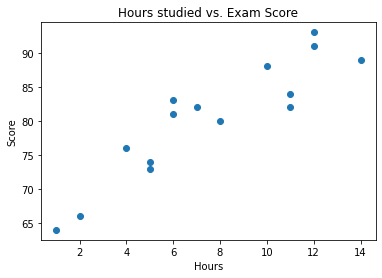

In [5]:
import pandas as pd

#create dataset
df = pd.DataFrame({'hours': [1, 2, 4, 5, 5, 6, 6, 7, 8, 10, 11, 11, 12, 12, 14],
                   'score': [64, 66, 76, 73, 74, 81, 83, 82, 80, 88, 84, 82, 91, 93, 89]})
      

#view first six rows of dataset
df[0:6]
import matplotlib.pyplot as plt

plt.scatter(df.hours, df.score)
plt.title('Hours studied vs. Exam Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.yticks([0,2,4,6,8,10])
year = [1950, 1951, 1952, ..., 2100]
pop = [2.538, 2.57, 2.62, ..., 10.85]
plt.plot(year, pop)
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('World Population Projections')
plt.yticks([0, 2, 4, 6, 8, 10],['0', '2B', '4B', '6B', '8B', '10B'])
plt.show()


The relationship does appear to be linear. As hours increases, score tends to increase as well in a linear fashion.

Create a boxplot to visualize the distribution of exam scores and check for outliers. By default, Python defines an observation to be an outlier if it is 1.5 times the interquartile range greater than the third quartile (Q3) or 1.5 times the interquartile range less than the first quartile (Q1).

If an observation is an outlier, a tiny circle will appear in the boxplot:

<AxesSubplot:>

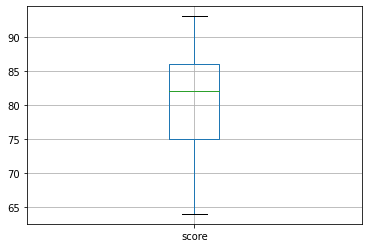

In [6]:
df.boxplot(column=['score']) 

There are no tiny circles in the boxplot, which means there are no outliers in our dataset.

Confirmed that the relationship between our variables is linear and that there are no outliers present, we can proceed to fit a simple linear regression mode

In [7]:
import statsmodels.api as sm

#define response variable
y = df['score']

#define explanatory variable
x = df[['hours']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     63.91
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           2.25e-06
Time:                        22:49:25   Log-Likelihood:                -39.594
No. Observations:                  15   AIC:                             83.19
Df Residuals:                      13   BIC:                             84.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3340      2.106     31.023      0.0

C:\Users\dexxe\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\dexxe\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


From the model summary we can see that the fitted regression equation is:

Score = 65.334 + 1.9824*(hours)

This means that each additional hour studied is associated with an average increase in exam score of 1.9824 points. And the intercept value of 65.334 tells us the average expected exam score for a student who studies zero hours.

We can also use this equation to find the expected exam score based on the number of hours that a student studies. For example, a student who studies for 10 hours is expected to receive an exam score of 85.158:

Score = 65.334 + 1.9824*(10) = 85.158

Here is how to interpret the rest of the model summary:

P>|t|: This is the p-value associated with the model coefficients. Since the p-value for hours (0.000) is significantly less than .05, we can say that there is a statistically significant association between hours and score.
R-squared: This number tells us the percentage of the variation in the exam scores can be explained by the number of hours studied. In general, the larger the R-squared value of a regression model the better the explanatory variables are able to predict the value of the response variable. In this case, 83.1% of the variation in scores can be explained by hours studied.
F-statistic & p-value: The F-statistic (63.91) and the corresponding p-value (2.25e-06) tell us the overall significance of the regression model, i.e. whether explanatory variables in the model are useful for explaining the variation in the response variable. Since the p-value in this example is less than .05, our model is statistically significant and hours is deemed to be useful for explaining the variation in score.

The residuals of a regression model are roughly normally distributed and are homoscedastic at each level of the explanatory variable. If these assumptions are violated, then the results of our regression model could be misleading or unreliable. 

Residual vs. fitted values plot: This plot is useful for confirming homoscedasticity. The x-axis displays the fitted values and the y-axis displays the residuals. As long as the residuals appear to be randomly and evenly distributed throughout the chart around the value zero, we can assume that homoscedasticity is not violated:

C:\Users\dexxe\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     63.91
Date:                Fri, 09 Sep 2022   Prob (F-statistic):           2.25e-06
Time:                        22:52:45   Log-Likelihood:                -39.594
No. Observations:                  15   AIC:                             83.19
Df Residuals:                      13   BIC:                             84.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3340      2.106     31.023      0.0

C:\Users\dexxe\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


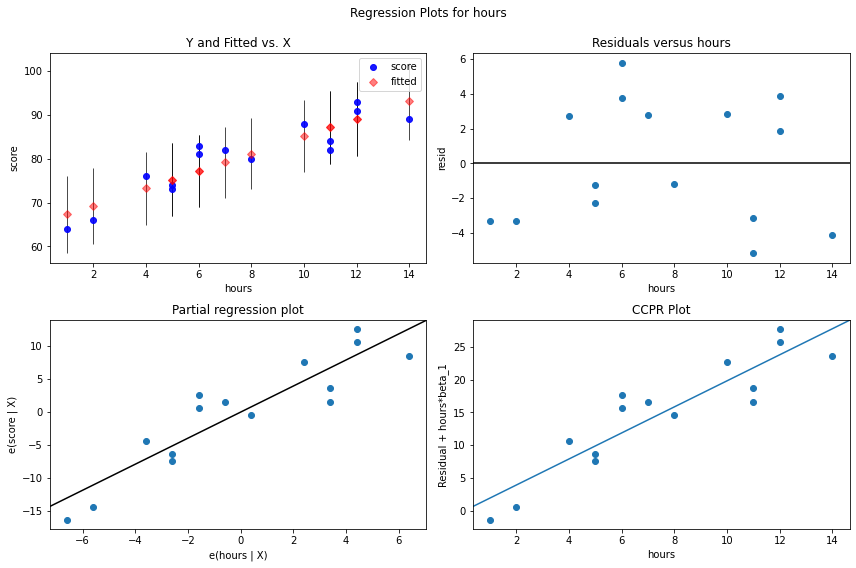

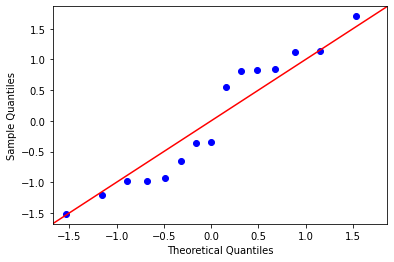

In [8]:
#view model summary
print(model.summary())

#produce residual plots
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'hours', fig=fig)

#produce Q-Q plot
res = model.resid
fig = sm.qqplot(res, fit=True, line="45")
plt.show()

Four plots are produced. The one in the top right corner is the residual vs. fitted plot. The x-axis on this plot shows the actual values for the predictor variable points and the y-axis shows the residual for that value.

Since the residuals appear to be randomly scattered around zero, this is an indication that heteroscedasticity is not a problem with the explanatory variable.

Q-Q plot: This plot is useful for determining if the residuals follow a normal distribution. If the data values in the plot fall along a roughly straight line at a 45-degree angle, then the data is normally distributed:

The residuals stray from the 45-degree line a bit, but not enough to cause serious concern. We can assume that the normality assumption is met.

Since the residuals are normally distributed and homoscedastic, we’ve verified that the assumptions of the simple linear regression model are met. Thus, the output from our model is reliable.